1. реализовать один из алгоритмов RL (рекомендуем Q-learning, a.k.a. SARSAMAX)
2. реализовать логику обучения агента используя среду из Gymnasium
3. решить задачу Taxi-v3
4. сделать небольшой отчет об обучении агента (графики награды)

Примечания для студентов:

* расчитывайте суммарную награду и среднюю награду за последние 100 эпизодов
* результат должен содержать исходный код агента, сохраненного агента, графики награды в процессе обучения агента

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

gym.__version__

'0.29.1'

In [11]:
env = gym.make("Taxi-v3")

'0.29.1'

In [12]:
def epsilon_greedy_action(q_values, epsilon, action_n):
    policy = np.ones(action_n) * epsilon / action_n
    max_action = np.argmax(q_values)
    policy[max_action] += 1 - epsilon

    return np.random.choice(np.arange(action_n), p=policy)

In [13]:
def QLearning(env, episode_n, noisy_episode_n, gamma=0.99, t_max=500, alpha=0.5, algorithm='QLearning'):
    state_n = env.observation_space.n  # observation space count states
    action_n = env.action_space.n  # action space count

    Q = np.zeros((state_n, action_n))  # create Q table space
    epsilon = 1  # epsilon greedy

    total_rewards = []  # total rewards to plot
    for episode in range(episode_n):
        total_reward = 0  # actual rewards for current episode
        state, _ = env.reset()  # reset environment

        for t in range(t_max):
            action = epsilon_greedy_action(Q[state], epsilon, action_n)  # select action based on epsilon
            next_state, reward, done, _, _ = env.step(action)  # environment next step
            Q[state][action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][action])  # re-calculate Q in [state][action]
            total_reward += reward  # collect reward

            if done:  # game over
                break

            state = next_state  # re-init state

        epsilon = max(0, epsilon - 1 / noisy_episode_n)  # re-calculate epsilon
        total_rewards.append(total_reward)  # add total reward to total rewards (will be used to plot)

    return Q, total_rewards, np.mean(total_rewards[-100:])  # Q, total rewards, rewards mean of last 100 episodes

In [14]:
Q, total_rewards, mean_last_100_rewards = QLearning(env, episode_n=500, noisy_episode_n=400, t_max=500, gamma=0.9)

print(f'mean of last 100 rewards: {mean_last_100_rewards}')

# plot me
plt.plot(total_rewards)
plt.title('Q-Learning for Taxi-v3:')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.show()

# use Q to calculate best agent result

mean of last 100 rewards: 7.03


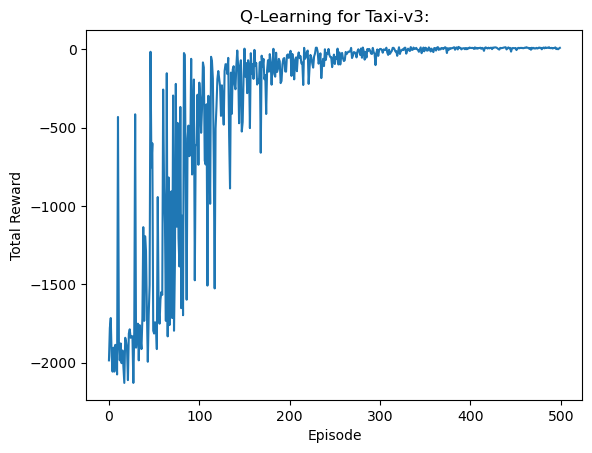